In [3]:
import os
os.chdir("D:/Python/Completar datos con redes neurales")

In [7]:
%pylab inline
import pandas as pd
import numpy as np
Estacion_01 = pd.read_excel('Estacion_01.xlsx',sheetname='Estacion_01',index_col=0)
Estacion_01 = Estacion_01.rename(columns={'Agregado': 'Est1'})
Estacion_02 = pd.read_excel('Estacion_02.xlsx',sheetname='Estacion_02',index_col=0)
Estacion_02 = Estacion_02.rename(columns={'Agregado': 'Est2'})
Estacion_03 = pd.read_excel('Estacion_03.xlsx',sheetname='Estacion_03',index_col=0)
Estacion_03 = Estacion_03.rename(columns={'Agregado': 'Est3'})
Estacion_03_5min = pd.read_excel('Estacion_03_5min.xlsx',sheetname='Estacion_03',index_col=0)
Estacion_03_5min = Estacion_03_5min.rename(columns={'Agregado': 'Est3'})

Populating the interactive namespace from numpy and matplotlib


NameError: name 'x' is not defined

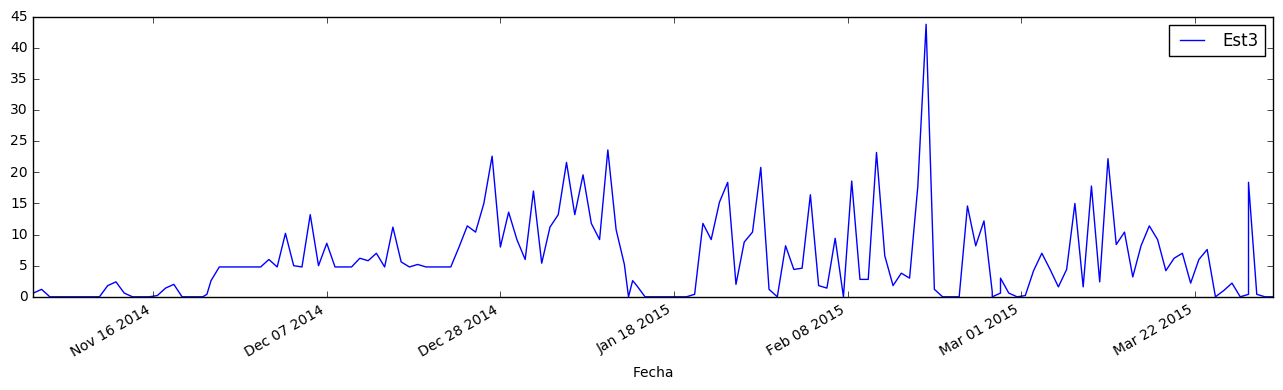

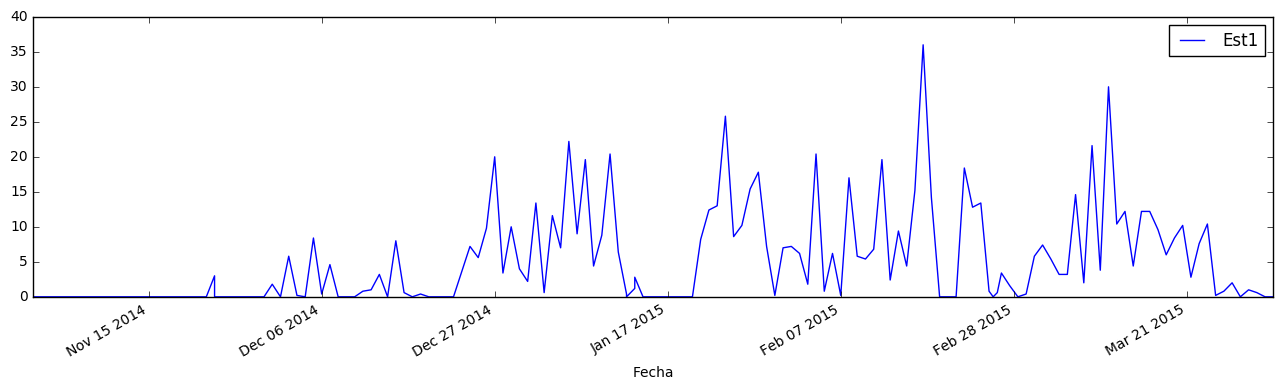

In [12]:
Estacion_01.ix['2014-11-01':'2015-03-31'].plot()
figsize(16,4)

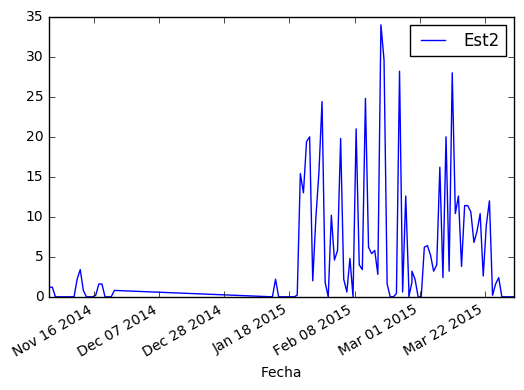

In [5]:
Estacion_02.ix['2014-11-01':'2015-03-31'].plot()

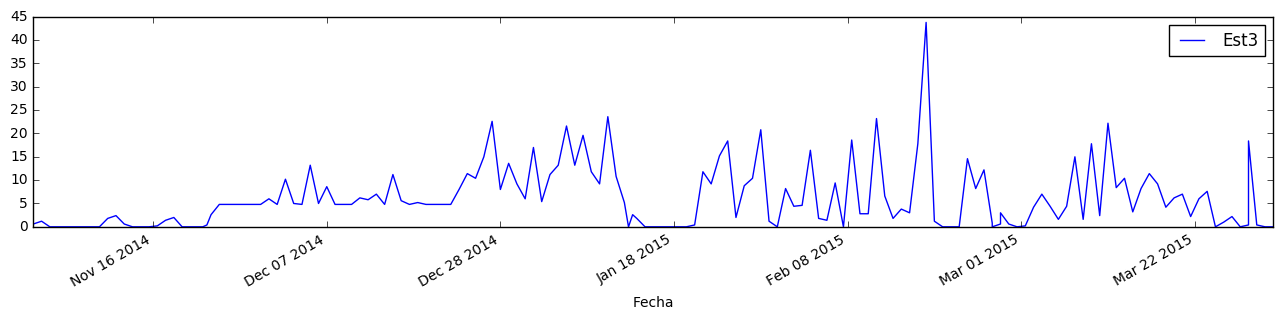

In [6]:
Estacion_03.ix['2014-11-01':'2015-03-31'].plot()

C:\Users\Stiben\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


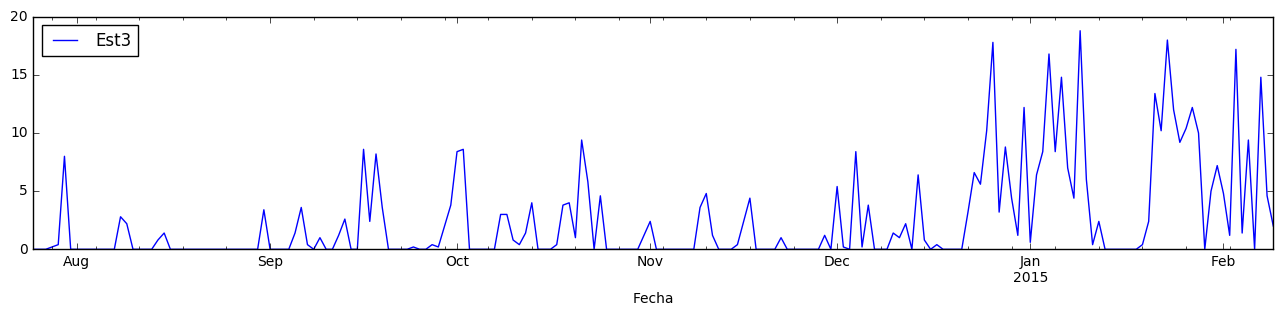

In [7]:
Estacion_03_5min.resample('24H', how='sum').plot()

In [8]:
MesDic = Estacion_03_5min.resample('24H', how='sum').ix['2014-12-01':'2014-12-31']
Estacion_03['Est3'].ix['2014-12-01':'2014-12-31'] = MesDic['Est3']

C:\Users\Stiben\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


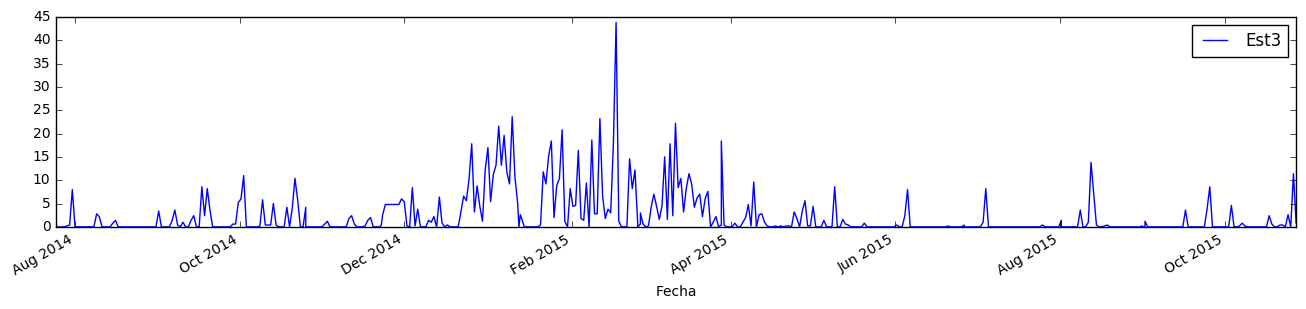

In [11]:
Estacion_03.plot()

In [9]:
TodasEstaciones = Estacion_01.resample('24H', how='sum')
TodasEstaciones['Est2']=Estacion_02['Est2'].resample('24H', how='sum')
TodasEstaciones['Est3']=Estacion_03['Est3'].resample('24H', how='sum')
TodasEstaciones.head()

C:\Users\Stiben\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':
C:\Users\Stiben\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  from ipykernel import kernelapp as app
C:\Users\Stiben\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  app.launch_new_instance()


,Est1,Est2,Est3
Fecha,,,
2014-07-25,0.0,NaN,0.0
2014-07-26,0.6,NaN,0.0
2014-07-27,0.0,NaN,0.0
2014-07-28,0.0,NaN,0.0
2014-07-29,0.2,NaN,0.2


(array([393000, 393720, 394464, 395208, 395880, 396600], dtype=int64),
 <a list of 6 Text xticklabel objects>)

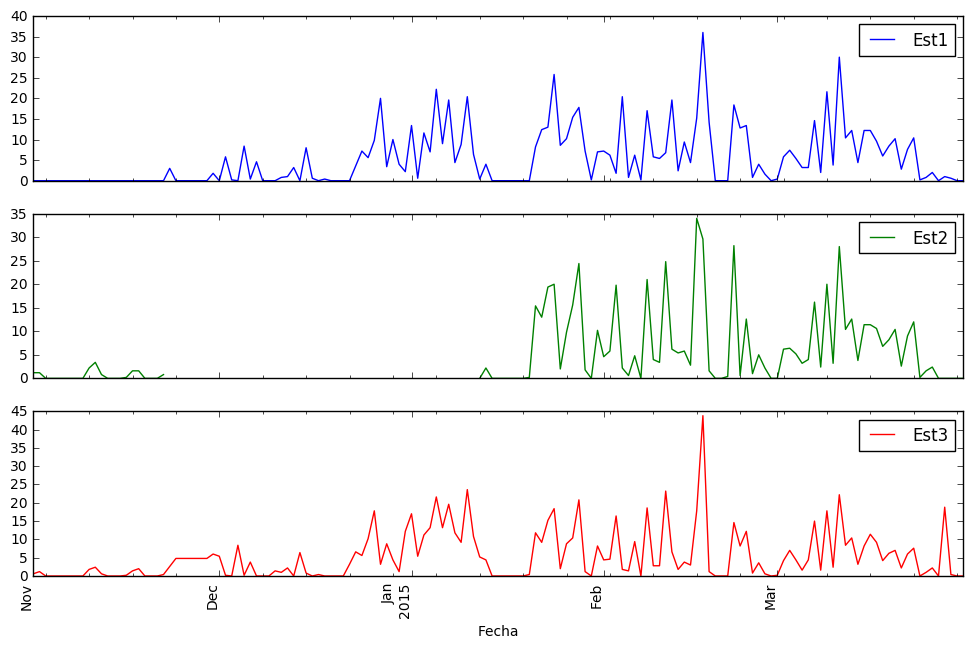

In [10]:
TodasEstaciones.ix['2014-11-01':'2015-03-31'].plot(subplots=True, figsize=(12, 8)); plt.legend(loc='best')
xticks(rotation='vertical')

In [12]:
from sknn.mlp import Regressor, Layer

capasinicio = TodasEstaciones.ix['2015-01-12':'2015-03-31'].as_matrix()[:,[0,2]]
capasalida = TodasEstaciones.ix['2015-01-12':'2015-03-31'].as_matrix()[:,1]
neurones =  1000
tasaaprendizaje = 0.00001
numiteraciones = 9000


redneural = Regressor(
    layers=[
        Layer("ExpLin", units=neurones), 
        Layer("ExpLin", units=neurones), Layer("Linear")],
    learning_rate=tasaaprendizaje,
    n_iter=numiteraciones)
redneural.fit(capasinicio, capasalida)


valortest = ([])

for i in range(capasinicio.shape[0]):
    prediccion = redneural.predict(np.array([capasinicio[i,:].tolist()]))
    valortest.append(prediccion[0][0])

In [13]:
#Get the prediction for the train set
capasinicio = TodasEstaciones.ix['2014-11-23':'2015-01-11'].as_matrix()[:,[0,2]]

valor = ([])

for i in range(capasinicio.shape[0]):
    prediccion = redneural.predict(np.array([capasinicio[i,:].tolist()]))
    valor.append(prediccion[0][0])

In [14]:
TodasEstaciones['Est2_Completed']=TodasEstaciones['Est2']
TodasEstaciones['Est2_Completed'].ix['2014-11-23':'2015-01-11']=valor

(0, 50)

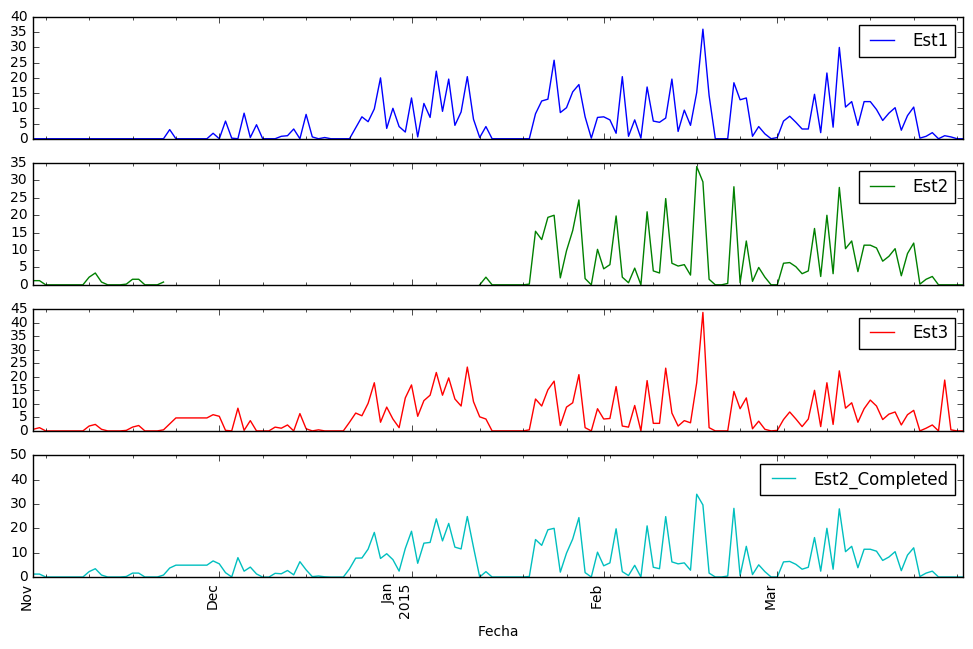

In [15]:
TodasEstaciones.ix['2014-11-01':'2015-03-31'].plot(subplots=True, 
                                                   figsize=(12, 8)); plt.legend(loc='best')
xticks(rotation='vertical')
ylim(0,50)